In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import numpy as np

In [2]:
data = pd.read_csv('../data/table.csv')
data.head()

,Tool,Year Published,Notable Features,Programming Language,Package Manager,Required Expertise,Software,Archival Stability
0,a. Raw Data QC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iSeqQC43,2020.0,Expression-based QC tool that detects outliers,R,NaN,++,https://github.com/gkumar09/iSeqQC,Stable
2,FastQC44,2018.0,QC tool for for high throughput sequence data,"Java, Anaconda",Anaconda,+++,http://www.bioinformatics.babraham.ac.uk/proje...,PUF
3,QC345,2014.0,Detection of batch effect and cross contamination,"Perl, R",Anaconda,+++,https://github.com/slzhao/QC3,Stable
4,kPAL46,2014.0,Alignment-free assessment QC tool by analyzing...,Python,Anaconda,+++,https://github.com/LUMC/kPAL,Stable


In [3]:
data['Year Published'].value_counts()

2014.0    47
2013.0    31
2015.0    24
2012.0    21
2011.0    20
2019.0    12
2010.0    11
2016.0    11
2018.0     9
2017.0     7
2009.0     3
2008.0     2
2020.0     1
Name: Year Published, dtype: int64

In [4]:
data['Required Expertise'].value_counts()

+++    112
++      37
Name: Required Expertise, dtype: int64

# Cumulative graph

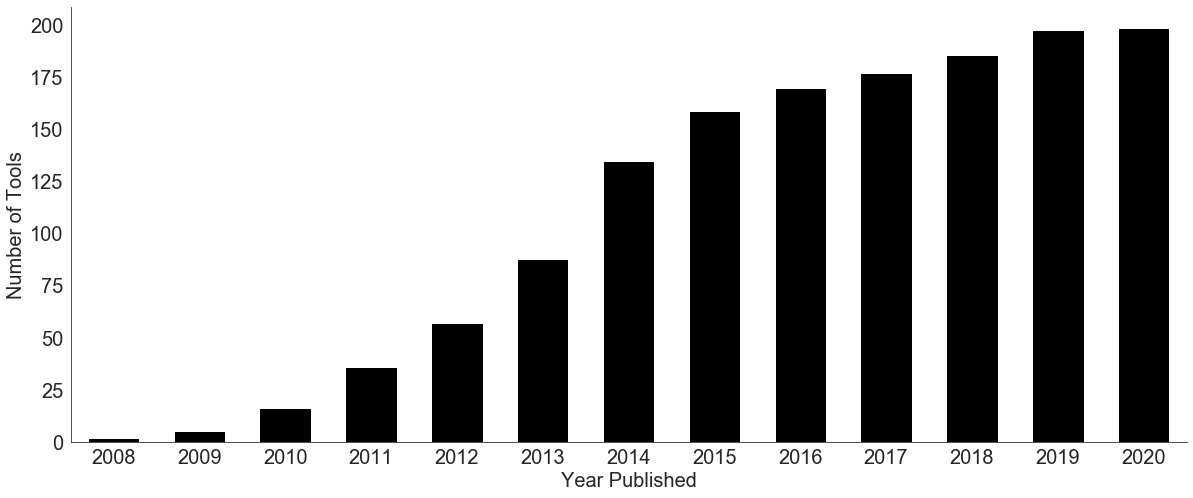

In [5]:
#Read in data & create total column
bar_data = pd.read_csv("../data/year_count.csv")
bar_data["total"] = bar_data.cumulation

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 8)})

#Plot 1 - background - "total" 
g=sns.barplot(x = bar_data.Year_Published, y = bar_data.total, color = "black")
plt.ylabel("Number of Tools")
plt.xlabel("Year Published")
sns.despine()

for item in ([g.xaxis.label, g.yaxis.label] +
             g.get_xticklabels() + g.get_yticklabels()):
    item.set_fontsize(20)
def change_width(g, new_value) :
    for patch in g.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .6)

plt.savefig('../figures/figure1.png')

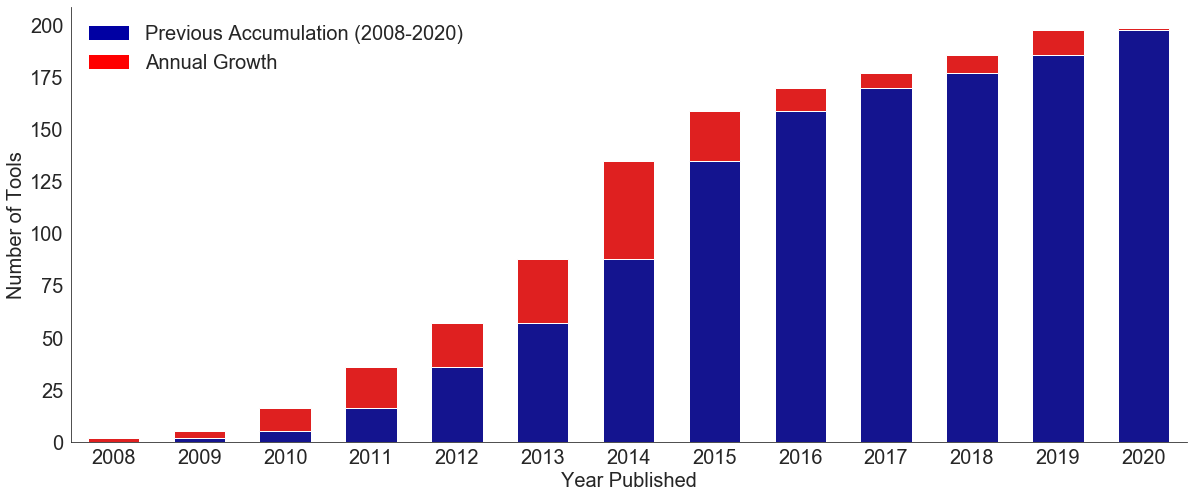

In [6]:
#Read in data & create total column
stacked_bar_data = pd.read_csv("../data/year_count.csv")
stacked_bar_data["total"] = stacked_bar_data.cumulation

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 8)})

#Plot 1 - background - "total" (top)
g=sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" 
bottom_plot = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.before_sum, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Previous Accumulation (2008-2020)', 'Annual Growth'], loc='best', prop={'size':20})
l.draw_frame(False)

sns.despine()
bottom_plot.set_ylabel("Number of Tools")
bottom_plot.set_xlabel("Year Published")

#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(20)
    
def change_width(g, new_value) :
    for patch in g.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .6)

plt.savefig('../figures/figure1a.png')

# Domain-based required expertise

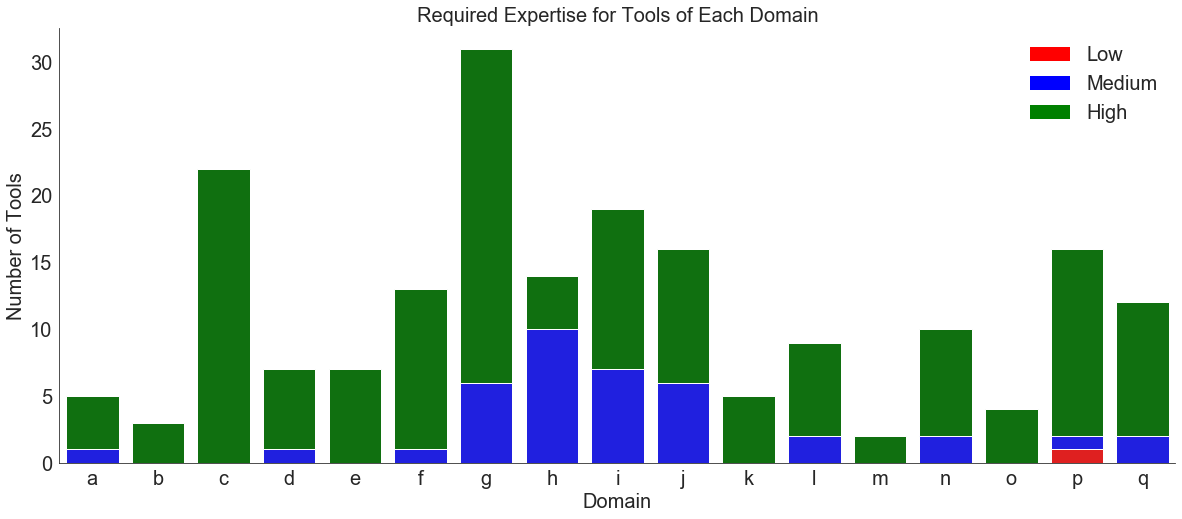

In [9]:
#Read in data & create total column
stacked_bar_data = pd.read_csv("../data/required_expertise.csv")
stacked_bar_data["total"] = stacked_bar_data.easy + stacked_bar_data.medium + stacked_bar_data.hard

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 8)})

#Plot 1 - background - "total" (top)
sns.barplot(x = stacked_bar_data.domain, y = stacked_bar_data.total, color = "green")

#Plot 2 - overlay - "medium" 
medium_plot = sns.barplot(x = stacked_bar_data.domain, y = stacked_bar_data.medium + stacked_bar_data.easy, 
                          color = "blue")

#Plot3 - overlay - "bottom"
bottom_plot = sns.barplot(x = stacked_bar_data.domain, y = stacked_bar_data.easy, color = "red")


topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
mediumbar = plt.Rectangle((0,0),1,1,fc='blue',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
l = plt.legend([bottombar, mediumbar, topbar], ['Low', 'Medium', 'High'], loc='best', prop={'size':20})
l.draw_frame(False)
#plt.xticks(rotation=90)
plt.title("Required Expertise for Tools of Each Domain", fontsize = 20)

sns.despine()
bottom_plot.set_ylabel("Number of Tools")
bottom_plot.set_xlabel("Domain")

#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(20)
    
def change_width(g, new_value) :
    for patch in g.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .6)

plt.savefig('../figures/figure2.png')